# Business Objective

The aim of this analysis is to bring out specific insight of restaurants in different locations 


# Importing Necessary Libraries for Analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

In [2]:
# read the csv file 
data = pd.read_csv('zomato.csv')

# Exploratory Data Analysis

In [3]:
data.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


# About the Features

- url: url of the restaurant in the zomato website
- address: the address of the restaurant 
- name: the name of the restaurant
- online_ordering: whether online ordering is available in that restaurant or not 
- book_table: if you can book a table in that restaurant or not
- rate: the overall rating of the restaurant on 5
- votes: contains total number of rating for the restaurant as of the above mentioned date
- phone: the phone number of the restaurant
- location: the neighbourhood where the restaurant is located
- restaurant_type
- dish_liked: dishes people liked in the restaurant
- cuisine:
- approx_cost(for two people)
- Menu_item: the menu of the restaurant

In [4]:
# check the number rows and columns of the dataset
data.shape

(51717, 17)

# Data Quality Assessment

In [5]:
# Display the variables' information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
missing_percentage = data.isnull().mean() * 100
missing_percentage

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [7]:
# checking duplicates
duplicates = data.duplicated().sum()
duplicates

0

In [8]:
# drop useless features (phone)
data = data.drop('phone', axis=1)

In [9]:
# describe object features
data.describe(include='object')


,url,address,name,online_order,book_table,rate,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,5124,19132,182,2913,7576,7595,39617,25942,3279


In [10]:
# describe numeric features
data.describe()


,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


Assessment: 

- There are features with missing values that can easily be resolve due to percentage of missing found in th columns and others that will be much more difficult like 'dish_liked'
- There are columns names that don't respect conventional naming which are the 2 last columns 
- There inconsistencies in the datatype of one column that is 'approx_cost(for two people)'
- There are wrongful data entries in the columns review_list and menu_type 
- Votes has a large standard deviation indicating that values here a dispersed

Analysing Columns with inaccuracies and missing values and resolving them

In [11]:
# Rename the column
data = data.rename(columns={'listed_in(city)': 'city'})
data = data.rename(columns={'listed_in(type)': 'type'})


In [12]:
# Replace missing values with the mode of the column
data['rate'] = data['rate'].fillna(data['rate'].mode().iloc[0])

In [13]:
# Filter the DataFrame to include only the rows with missing values in the column of interest
rows_with_missing_values = data[data['location'].isnull()].copy()

# Display the rows with missing values
rows_with_missing_values.head(3)

,url,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,type,city
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NEW,0,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
9874,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NEW,0,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,BTM
13693,https://www.zomato.com/bangalore/mohabbat-desi...,"Chandapura- Anakal Main Road, Oppsite Vemana H...",Mohabbat Desi Restaurant,No,No,NEW,0,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Electronic City


In [14]:
# Replace null values in column location with corresponding values in the column city
data['location'] = data['location'].fillna(data['city'])

In [15]:
# Replace missing values with the mode of the column
data['rest_type'] = data['rest_type'].fillna(data['rest_type'].mode().iloc[0])

In [16]:
data['cuisines'] = data['cuisines'].fillna(data['cuisines'].mode().iloc[0])

In [17]:
unique_values = data['approx_cost(for two people)'].unique()
unique_values

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [18]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(",", "")

# Replace NaN values with a placeholder value
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].replace(np.nan, -1)

# Convert 'Age' column from object to float
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(float)

# Calculate the mean of the 'Age' column, excluding the placeholder value
mean_age = data.loc[data['approx_cost(for two people)'] != -1, 'approx_cost(for two people)'].mean()

# Replace the placeholder value with the mean of the column
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].replace(-1, mean_age)

# Convert 'Age' column from float to int
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(int)


Univariate Analysis

In [40]:
data['rest_type'].value_counts()

rest_type
Quick Bites                   19359
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [19]:
data['type'].value_counts()

type
Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: count, dtype: int64

In [20]:
data['city'].value_counts()

city
BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: count, dtype: int64

In [21]:
unique_values = data['location'].unique()
unique_values

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima

Text(0, 0.5, 'Count')

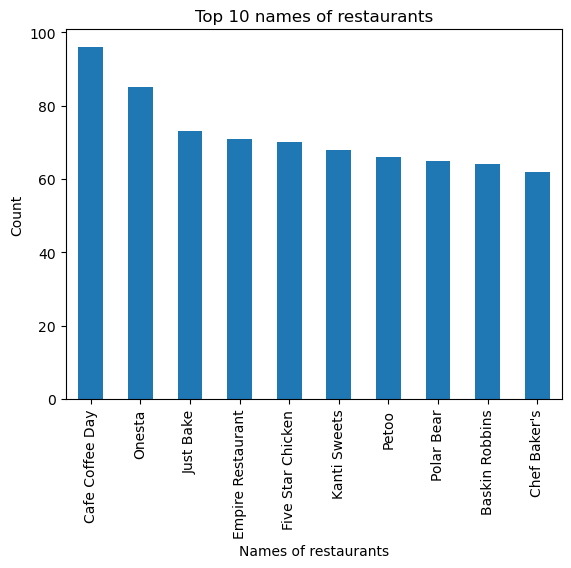

In [22]:
ax = data['name'].value_counts().head(10).plot(kind='bar', title = 'Top 10 names of restaurants')
ax.set_xlabel('Names of restaurants')
ax.set_ylabel('Count')

Multi-Variate Analysis

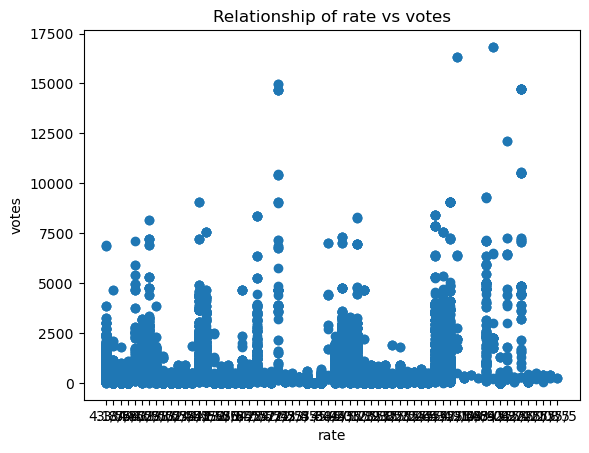

In [37]:
plt.scatter(data['rate'], data['votes'])

plt.xlabel('rate')
plt.ylabel('votes')
plt.title('Relationship of rate vs votes')

plt.show()

# Restaurant Count in Various Cities

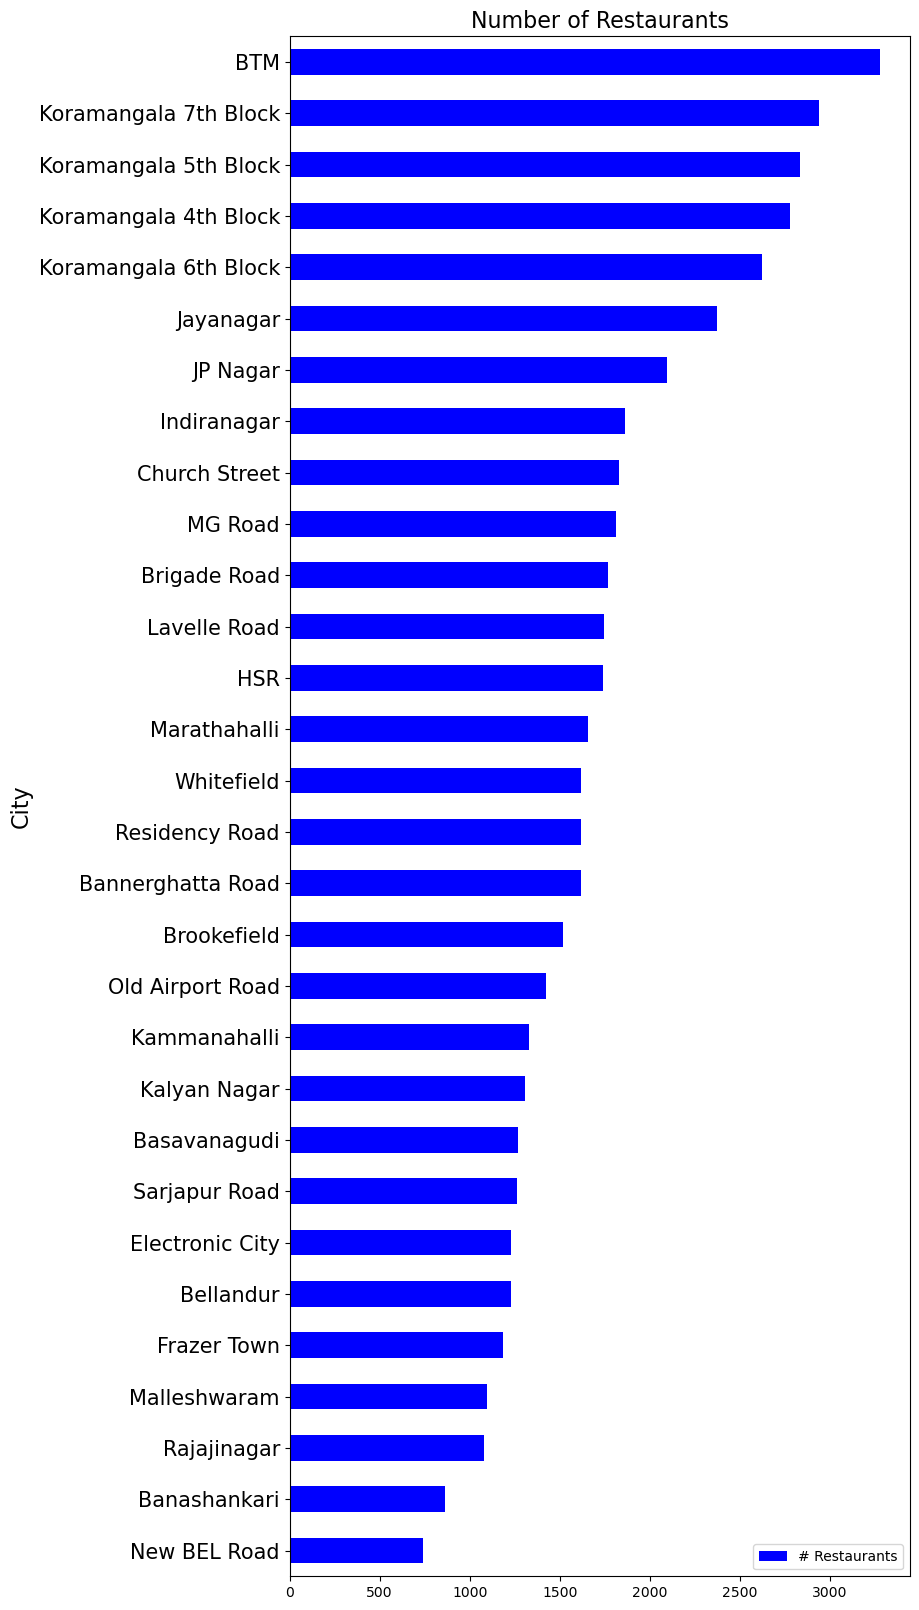

In [30]:
histogram = data.groupby('city')['name'].count().sort_values(ascending=True)
ax = histogram.plot(kind='barh', figsize=(8, 20), color='blue')  # Use 'barh' for horizontal bar chart
rects = ax.patches
labels = list(histogram)
ax.yaxis.set_tick_params(labelsize=15)  # Adjust tick label size on y-axis
ax.legend(fontsize=14)
ax.set_title('Number of Restaurants', fontsize=16)
ax.set_ylabel('City', fontsize=16)  # Set y-axis label
ax.legend(['# Restaurants'])

# Approximate price of food in a City

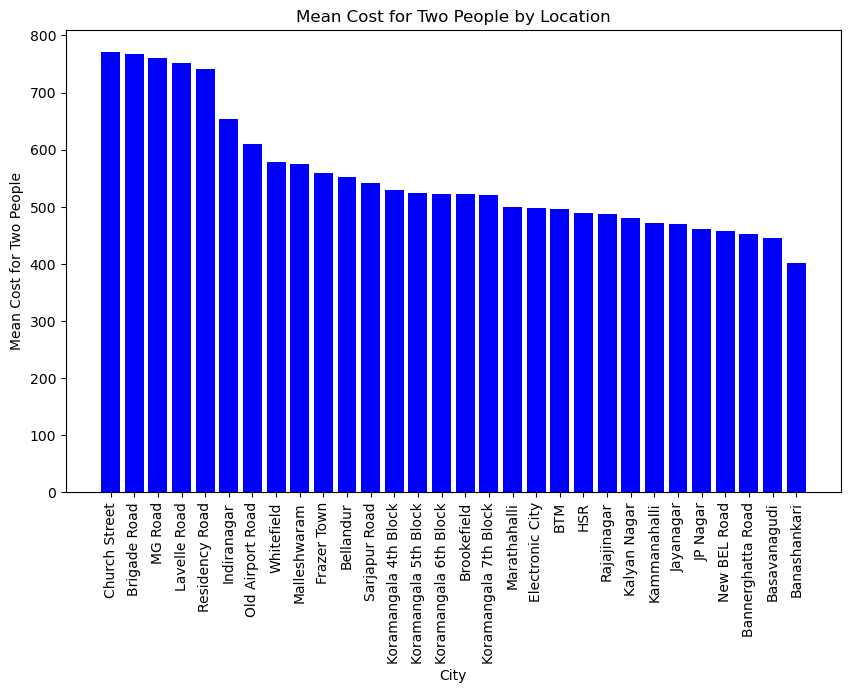

In [35]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(str)
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(",", "").astype(float)

mean_cost = data.groupby('city')['approx_cost(for two people)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))  # Set the figure size

# Create the histogram
plt.bar(mean_cost.index, mean_cost.values, color='blue')

plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel('City')  # Set x-axis label
plt.ylabel('Mean Cost for Two People')  # Set y-axis label
plt.title('Mean Cost for Two People by Location')  # Set the title

plt.show()  # Display the histogram


# Famous City Cuisine

In [39]:
# types = set()
# def check(x):
#     if(type(x) == list):
#         for y in x:
#             types.add(y.strip())
# cuisine = data['cuisines'].str.split(',').apply(check)
# column_names = list(types)
# # create a new dataframe
# cities = pd.DataFrame(columns=column_names)
# cities['city'] = data.groupby('city').groups.keys()
# cities = cities.set_index('city').fillna(0)
# i=0
# for i in range(0,len(data)):
#     for x in types:
#         if type(data.loc[i, 'cuisines']) == str and x in data.loc[i, 'cuisines']:
#             cities.loc[data.loc[i, 'city'], x] = cities.loc[data.loc[i, 'city'], x]+1

